# TP2 : Apprentissage multi-label sur des données textuelles

*Jordan Dutel et Ariane Paradan*

---
---

# Partie 1

## I. Import des librairies

In [2]:
import importlib
import function_TAA as taa
importlib.reload(taa)

<module 'function_TAA' from '/home/jordan/Documents/Etudes/Master_Bio_info/Master_2/Semestre_1/TAA/TP/TP2_MLL_NLP/function_TAA.py'>

## II. Load data

In [3]:
df = taa.load_data('PubMed-multi-label-dataset.csv', sep=',')

                                                   Title  \
0      Expression of p53 and coexistence of HPV in pr...   
1      Vitamin D status in pregnant Indian women acro...   
2      [Identification of a functionally important di...   
3      Multilayer capsules: a promising microencapsul...   
4      Nanohydrogel with N,N'-bis(acryloyl)cystine cr...   
...                                                  ...   
49995  Five donors-one recipient: modeling a mosaic o...   
49996  The role of eicosanoids in cyclosporine nephro...   
49997  Impact of pancreaticoduodenal arcade dilation ...   
49998  Outcomes of Preterm Infants following Discussi...   
49999  Molecular subtyping of Borrelia burgdorferi se...   

                                            abstractText  \
0      Fifty-four paraffin embedded tissue sections f...   
1      The present cross-sectional study was conducte...   
2      The occurrence of individual amino acids and d...   
3      In 1980, Lim and Sun introduced 

## III. Pre-processing

### A. Data infos

In [ ]:
taa.get_info(df)

### B. Text cleaning (lowercase, tokenize, stop word...)

La fonction est longue à faire tourner (~4 min)

In [4]:
df = taa.clean_text(df, text_column='abstractText')

### C. Features and labels split

In [5]:
target_column = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z']
X, y = taa.split_feature_label(df, target_column, multilabel=True)

Les features sont dans le dataframe X (50000 lignes, 6 colonnes).
La target est dans le dataframe y (50000 lignes, 14 colonnes).


### D. Split train test

In [6]:
X_train, X_test, y_train, y_test = taa.split_train_test(X, y, test_size=0.5, random_state=42)

Le dataset a été divisé en training et testing sets avec 50.0% des données dans le testing set.
X_train : 25000 lignes, 6 colonnes (features)
X_test : 25000 lignes, 6 colonnes (features)
y_train : 25000 lignes, 14 colonnes (labels)
y_test : 25000 lignes, 14 colonnes (labels)


In [7]:
X_train_tfidf_matrix, X_test_tfidf_matrix, feature_names = taa.tfidf_vectorize2(X_train, X_test, max_features=2000, text_column_name='abstractText')

Les textes ont été vectorisés en 2000 features.
Matrice TF-IDF pour X_train : 25000 lignes, 2000 colonnes (features)
Matrice TF-IDF pour X_test : 25000 lignes, 2000 colonnes (features)

Feature_names (Vocabulaire) : 

['aa' 'abdominal' 'ability' 'able' 'abnormal' 'abnormalities' 'absence'
 'absolute' 'absorption' 'access' 'accompanied' 'according' 'account'
 'accumulation' 'accuracy' 'accurate' 'acetate' 'achieve' 'achieved'
 'acid' 'acids' 'acquired' 'acquisition' 'act' 'action' 'actions'
 'activated' 'activation' 'active' 'activities' 'activity' 'acute' 'ad'
 'adaptation' 'added' 'addition' 'additional' 'additionally' 'address'
 'adenosine' 'adequate' 'adherence' 'adhesion' 'adjacent' 'adjusted'
 'adjustment' 'administered' 'administration' 'admission' 'admitted'
 'adolescents' 'adult' 'adults' 'advanced' 'adverse' 'affect' 'affected'
 'affecting' 'affects' 'affinity' 'age' 'aged' 'agent' 'agents' 'ages'
 'aging' 'agonist' 'agreement' 'aim' 'aimed' 'aims' 'air' 'airway' 'al'
 'albumi

## IV. Processing

### A. Sans extraction des concepts

30min pour run le ClassifierChain

In [98]:
results = taa.run_models(X_train_tfidf_matrix, X_test_tfidf_matrix, y_train, y_test)

Running MultiOutputClassifier...
Evaluating MultiOutputClassifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76     11641
           1       0.95      0.99      0.97     23274
           2       0.86      0.83      0.84     13179
           3       0.90      0.89      0.89     15486
           4       0.81      0.96      0.88     19629
           5       0.84      0.58      0.69      4437
           6       0.82      0.88      0.85     16802
           7       0.58      0.09      0.15      3048
           8       0.71      0.40      0.51      2839
           9       0.72      0.23      0.35      2723
          10       0.73      0.32      0.45      3729
          11       0.86      0.87      0.86     10623
          12       0.81      0.76      0.78     11447
          13       0.74      0.50      0.60      4024

   micro avg       0.85      0.81      0.83    142881
   macro avg       0.79      0.64      0.6

KeyboardInterrupt: 

### B. Avec extraction des concepts

In [8]:
svd, X_train_svd_matrix, X_test_svd_matrix = taa.extract_concept_SVD(2, X_train_tfidf_matrix, X_test_tfidf_matrix)

In [9]:
# Afficher les 10 mots les plus pertinents pour chaque concept
taa.print_top_words(svd, feature_names, 10)

Concept #0: patients cells group study treatment cell expression using results levels
Concept #1: patients group years clinical risk age patient cases treatment months



In [10]:
results = taa.run_models(X_train_svd_matrix, X_test_svd_matrix, y_train, y_test)

Running MultiOutputClassifier...
Evaluating MultiOutputClassifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.52      0.59     11641
           1       0.93      1.00      0.96     23274
           2       0.76      0.68      0.72     13179
           3       0.79      0.82      0.80     15486
           4       0.79      1.00      0.88     19629
           5       0.00      0.00      0.00      4437
           6       0.74      0.90      0.81     16802
           7       0.00      0.00      0.00      3048
           8       0.00      0.00      0.00      2839
           9       0.00      0.00      0.00      2723
          10       0.00      0.00      0.00      3729
          11       0.81      0.75      0.78     10623
          12       0.73      0.67      0.70     11447
          13       0.25      0.00      0.00      4024

   micro avg       0.79      0.71      0.75    142881
   macro avg       0.46      0.45      0.4

KeyboardInterrupt: 

## V. Interprétations

Définition des métriques
- Micro-F1 : 
    - Moyenne pondérée des F1-scores, calculée sur l'ensemble des échantillons et des labels. Elle accorde plus de poids aux classes fréquentes.
    - Indique la performance globale, favorisant les labels fréquents.

- Macro-F1 : 
    - Moyenne des F1-scores par classe, non pondérée par la fréquence des classes.
    - Évalue l'équilibre des performances sur toutes les classes, même les rares.

- Zero-One-Loss : 
    - Proportion d'échantillons mal prédits entièrement (aucun label correct pour ces échantillons).
    - Plus cette valeur est basse, plus la méthode est précise dans ses prédictions globales.


---


MultiOutputClassifier Metrics :
- Sans extraction de concept :
    - micro-F1: 0.8282540933682061
    - macro-F1: 0.6836620901639565
    - zero-one-loss: 0.86224
- Avec extraction de concept :
    - micro-F1: 0.7492527939410732
    - macro-F1: 0.44628391519437743
    - zero-one-loss: 0.93528

ClassifierChain Metrics:
- Sans extraction de concept :
    - micro-F1: 0.7800861548030066
    - macro-F1: 0.6245708592773794
    - zero-one-loss: 0.91156
- Avec extraction de concept :
    - micro-F1: 0.7323635473724367
    - macro-F1: 0.48255564574963455
    - zero-one-loss: 0.94308


---


Micro-F1 et Macro-F1 diminuent :
- La réduction de dimensions via TruncatedSVD réduit le détail et la richesse de l’information disponible pour la classification. Cela peut entraîner une perte d’efficacité, notamment pour des labels rares ou spécifiques.
- Micro-F1 :
    - Une diminution de la Micro-F1 signifie que les modèles deviennent moins performants sur les classes fréquentes. Cela peut arriver parce que :
        - La réduction de dimensions élimine des informations discriminantes importantes pour séparer correctement les classes.
        - Les données simplifiées via SVD ne contiennent plus suffisamment de diversité pour capturer les relations spécifiques aux labels fréquents.
- Macro-F1 :
    - La baisse de la Macro-F1 signifie que les performances se détériorent également sur les classes rares. Cela peut indiquer que :
        - Les classes peu fréquentes perdent encore plus d’information lors de la réduction de dimensions.
        - Les modèles ont du mal à distinguer des concepts fins ou spécifiques à cause de l’agrégation des données (SVD regroupe plusieurs mots synonymes ou termes proches dans des "concepts")

Zero-One-Loss augmente :
- Une augmentation de la zero-one-loss signifie que davantage d’échantillons n’ont aucun label correctement prédit. Cela peut s'expliquer par :
    - La simplification excessive des données via SVD, qui rend plus difficile pour les modèles de capturer des associations précises entre les textes et leurs labels.
    - Les concepts générés par SVD peuvent introduire de la confusion, en regroupant des termes ou des relations qui étaient distinctes dans les données originales.

Différence entre MOC et ECC :
- MultiOutputClassifier a de meilleures performances générales (Micro-F1, Macro-F1) car il considère chaque label de manière indépendante. En revanche, ClassifierChain peut souffrir si les premières étapes de la chaîne introduisent des erreurs.


---


Impact de l'extraction de concepts
- Réduction de la richesse des données :
        - La représentation via SVD simplifie les données en les projetant dans un espace de dimensions réduites. Bien que cela puisse résoudre des problèmes comme la synonymie ou la polysémie, cela peut aussi éliminer des détails importants pour la classification, surtout dans des tâches complexes comme le multi-label.
- Perte de granularité :
        - Les "concepts" créés par SVD sont des abstractions qui peuvent être utiles pour des tâches générales (comme la recherche d’information ou le regroupement thématique). Cependant, pour une tâche supervisée, cette abstraction peut rendre les données moins spécifiques et donc moins informatives pour les modèles.

---

# Partie 2 : Word2Vec

### I. Apprentissage de notre Word2vec

In [14]:
model = taa.train_and_save_W2V_model(X_train, 'abstractText', model_name='W2V_model.h5', model_size=100)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

### I.bis Load W2V model

Ou load un model déjà calculé

In [51]:
model = taa.load_W2V_model('W2V_model.h5')

'W2V_model.h5' model loaded successfully !


In [23]:
# nombre total de mots ou tokens uniques qui ont été appris par le modèle Word2Vec
len(model.wv.index_to_key)

64145

In [24]:
# Voir le vecteur de mot pour un mot spécifique
model.wv['easy']

array([ 0.70551544, -0.58564746,  1.2773905 ,  0.39034715, -1.1717767 ,
       -0.50836295, -0.6285295 , -3.5601301 , -2.4200902 , -0.69639826,
       -0.11781736,  2.6128697 ,  1.8171641 ,  0.5056995 ,  0.08613703,
        1.9855902 , -0.9375737 , -0.08012076, -3.3683484 , -1.7677648 ,
       -4.0997014 ,  1.0303427 , -3.4065216 , -1.2161359 ,  2.3347836 ,
        0.49892956,  2.7193198 ,  0.8653835 , -2.0255556 , -2.4237309 ,
        0.93678135,  0.47518346, -1.4093188 ,  2.7081394 ,  5.271242  ,
       -1.1915237 ,  0.64169633,  0.70824975, -0.89290154, -1.1036202 ,
        1.6426104 ,  3.555921  , -1.8148981 ,  4.6762214 , -1.2569295 ,
        0.30270147,  0.16752827,  0.7504458 , -0.30910093,  0.9099122 ,
       -3.041061  ,  1.0854207 ,  0.3324717 ,  0.24070838,  2.2364395 ,
       -2.0504613 ,  0.86605364, -3.0726595 , -1.2031035 , -0.14883672,
       -1.5186865 , -0.71611446,  0.2074284 , -2.4748237 , -0.35753253,
        1.4049083 , -0.21507818, -0.63963354, -0.40001556,  0.21

#### B. Évaluation

##### 1. Visualisation 2D

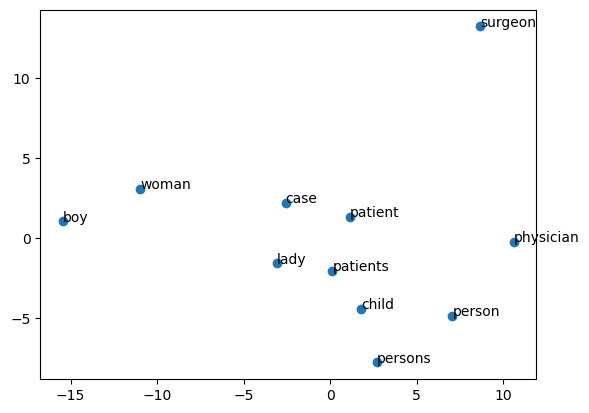

In [123]:
taa.plot_word_2d(model, 'patient')

##### 2. Visualisation Heatmap

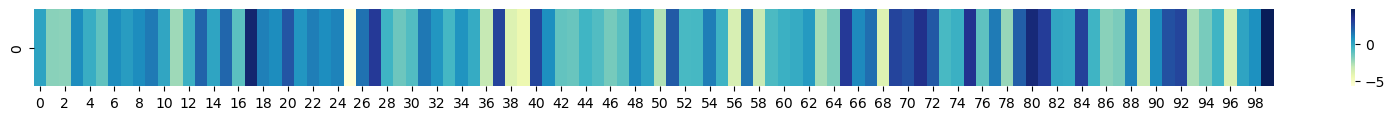

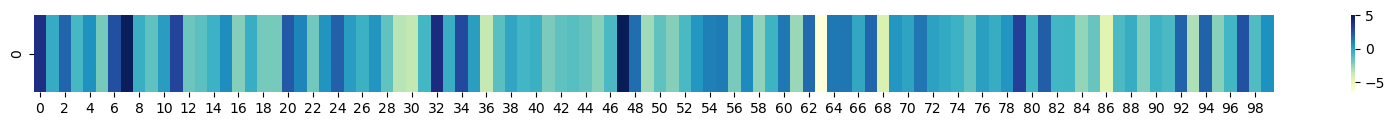

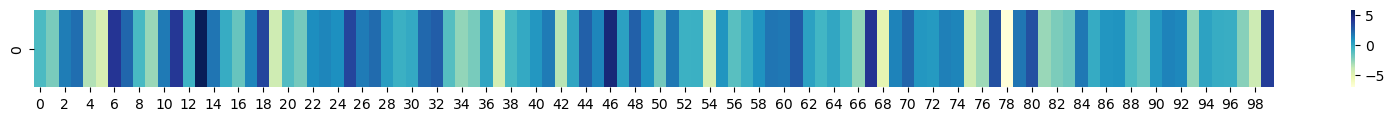

In [ ]:
taa.simple_plot_W2V_heatmap(model.wv['surgeon'])
taa.simple_plot_W2V_heatmap(model.wv['nurse'])
taa.simple_plot_W2V_heatmap(model.wv['boy'])

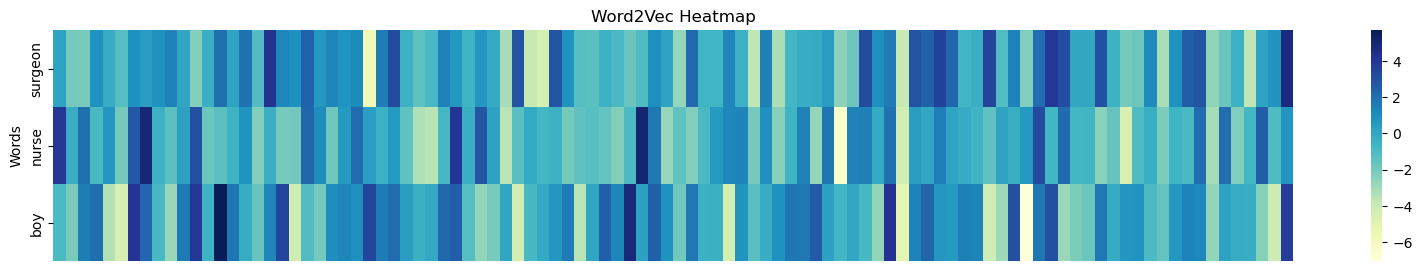

In [ ]:
words = ['surgeon', 'nurse', 'boy']
taa.plot_W2V_heatmap(model, words=words)

##### 3. Évaluation numérique

In [36]:
taa.less_similar_word(model, ['food','drink','play'])

Le mot le moins similaire parmi ['food', 'drink', 'play'] est 'play'.


'play'

In [40]:
taa.most_similar_words(model, close_to='patient', topn=10)

Les mots les plus similaires à ['patient'] et dissimilaires à [] sont:


[('patients', 0.6226524114608765),
 ('child', 0.5518375635147095),
 ('case', 0.5492845177650452),
 ('girl', 0.5182830095291138),
 ('surgeon', 0.49075940251350403),
 ('woman', 0.4906884729862213),
 ('boy', 0.4864200949668884),
 ('neurologic', 0.4727533459663391),
 ('preoperative', 0.4698534309864044),
 ('children', 0.4488997161388397)]

In [41]:
taa.most_similar_words(model, close_to=['nurse', 'doctor'], far_from='lady', topn=5)

Les mots les plus similaires à ['nurse', 'doctor'] et dissimilaires à ['lady'] sont:


[('nurses', 0.5024677515029907),
 ('service', 0.4803749620914459),
 ('care', 0.47672343254089355),
 ('formal', 0.4644092917442322),
 ('nursing', 0.4605455994606018)]

### II. Vectorisation

#### A. Vectorisation sans TF-IDF

In [69]:
df_word2vec_without_tfidf_train = taa.word2vec_generator(X_train['abstractText'], model, 100)
df_word2vec_without_tfidf_test = taa.word2vec_generator(X_test['abstractText'], model, 100)

Les représentations Word2Vec moyennes ont été générées pour 25000 textes.
Les représentations Word2Vec moyennes ont été générées pour 25000 textes.


Colonnes : Chaque colonne représente une dimension (ou feature) dans l'espace vectoriel généré par le modèle Word2Vec. Ici le modèle utilise un vector_size=100, alors on a 100 colonnes, où chaque colonne correspond à une dimension du vecteur.

Lignes : Chaque ligne correspond à un document unique dans le corpus. La valeur dans chaque cellule est la moyenne des valeurs des vecteurs des mots qui composent ce document.

Valeurs : Ce sont les coordonnées du vecteur moyen pour chaque document

#### B. Vectorisation avec TF-IDF

La fonction tourne à l'infini, ou très très long (>30min)

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def word2vec_with_tfidf(texts, model, vector_size):
    """
    Vectorise les textes en utilisant Word2Vec pondéré par TF-IDF en utilisant une matrice sparse.
    
    Parameters:
    texts (list of str): Textes sous forme de chaînes.
    model (Word2Vec): Modèle Word2Vec entraîné.
    vector_size (int): Dimension des vecteurs Word2Vec.
    
    Returns:
    pd.DataFrame: DataFrame contenant les vecteurs moyens pondérés pour chaque texte.
    """
    # Calcul des scores TF-IDF
    tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda text: text.split())
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)  # matrice sparse
    
    # Construction des vecteurs Word2Vec pondérés par TF-IDF
    vectors = []
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    for i, word_list in enumerate(texts):
        arr = np.zeros(vector_size)
        valid_words = 0
        for word in word_list.split():  # Texte sous forme de chaîne
            if word in feature_names:
                word_index = feature_names.tolist().index(word)
                tfidf_score = tfidf_matrix[i, word_index]  # Accéder à l'élément de la matrice sparse
                
                try:
                    arr += model.wv[word] * tfidf_score  # Pondérer avec TF-IDF
                    valid_words += 1
                except KeyError:
                    continue
                
        if valid_words > 0:
            arr /= valid_words  # Moyenne pondérée des vecteurs des mots
        vectors.append(arr)
    
    df_word2vec_tfidf = pd.DataFrame(vectors)
    return df_word2vec_tfidf


df_word2vec_tfidf_train = word2vec_with_tfidf(X_train['abstractText'], model, 100)
df_word2vec_tfidf_test = word2vec_with_tfidf(X_test['abstractText'], model, 100)

KeyboardInterrupt: 

In [71]:
df_word2vec_with_tfidf_train = taa.word2vec_generator(X_train_tfidf_matrix, model, 100)

AttributeError: 'csr_matrix' object has no attribute 'apply'

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tokenized_texts = [corpus.split() for text in corpus]

# Calcul des scores TF-IDF
tfidf = TfidfVectorizer()
tfidf.fit([" ".join(text) for text in corpus])  # Apprentissage sur les textes
tfidf_dict = {word: tfidf.vocabulary_.get(word, 0) for word in tfidf.get_feature_names_out()}

def word2vec_tfidf(texts, model, vector_size, tfidf_dict):
    dict_word2vec = {}
    for index, word_list in enumerate(texts):
        arr = np.zeros(vector_size)
        total_weight = 0
        for word in word_list:
            try:
                weight = tfidf_dict.get(word, 0)
                arr += model.wv[word] * weight
                total_weight += weight
            except KeyError:
                continue
        dict_word2vec[index] = arr / total_weight if total_weight > 0 else arr
    return pd.DataFrame(dict_word2vec).T

ValueError: empty vocabulary; perhaps the documents only contain stop words

Je n'arrive pas à faire du W2V avec TF-IDF !!!

### III. Run models

In [78]:
taa.run_models(df_word2vec_without_tfidf_train, df_word2vec_without_tfidf_test, y_train, y_test)

Running MultiOutputClassifier...
Evaluating MultiOutputClassifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76     11641
           1       0.95      0.99      0.97     23274
           2       0.84      0.83      0.84     13179
           3       0.91      0.89      0.90     15486
           4       0.81      0.96      0.88     19629
           5       0.81      0.62      0.70      4437
           6       0.82      0.89      0.85     16802
           7       0.59      0.06      0.11      3048
           8       0.68      0.45      0.54      2839
           9       0.68      0.28      0.39      2723
          10       0.68      0.32      0.44      3729
          11       0.85      0.86      0.85     10623
          12       0.80      0.76      0.78     11447
          13       0.74      0.57      0.65      4024

   micro avg       0.84      0.82      0.83    142881
   macro avg       0.78      0.66      0.6

{'MOC': {'micro-F1': 0.8295847627724238,
  'macro-F1': 0.6906089721607224,
  'zero-one-loss': 0.8668},
 'ECC': {'micro-F1': 0.8208462664919668,
  'macro-F1': 0.7049407977703358,
  'zero-one-loss': 0.88088}}

À comparer avec les résultats du modèle W2V pour les données vectorisés avec TF-IDF (mais pour l'instant ça ne marche pas !!!)

### V. Modèle Word2Vec pré-entrainé de Google

#### A. Charger le modèle

In [8]:
from gensim.models import KeyedVectors

# Charger le fichier Word2Vec pré-entraîné
file_path = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(file_path, binary=True)

# Vérifier si un mot existe dans le modèle
print("king" in model.key_to_index) # Affiche True si le mot "king" est présent dans le modèle

# Accéder au vecteur d'un mot
print(model["king"])  # Affiche le vecteur associé au mot "king"


True
[ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125 -0.2421875  -0.30273438
 -0.17773438 -0.02490234 -0.16796875 -0.16992188  0.03466797  0.00521851
  0.04638672  0.12890625  0.13671875  0.11279297  0.05957031  0.13671875
  0.10107422 -0.17675781 -0.25195312  0.05981445  0.34179688 -0.03112793
  0.10449219  0.06176758  0.12451172  0.40039062 -0.32226562  0.08398438
  0.0390625   0.00585938  0.0703125   0.17285156  0.13867188 -0.23144531
  0.28320312  0.14257812  0.34179688 -0.02392578 -0.10986328  0.03320312
 -0.0546875   0.01531982 -0.16210938  0.15820312 -0.25976562  0.0201416
 -0.16308594  0.00135803 -0.14453125 -0.05688477  0.04296875 -0.0246582
  0.18554688  0.44726562  0.00958252  0.13183594  0.09863281 -0.18554688
 -0.10009766 -0.13378906 -0.125       0.28320312  0.12304688  0.05322266
 -0.17773438  0.0859375  -0.02185059  0.02050781 -0.13964844  0.02514648
  0.13867188 -0.10546875  0.13867188  0.08886719

In [82]:
# nombre total de mots ou tokens uniques qui ont été appris par le modèle Word2Vec
len(model.index_to_key)

3000000

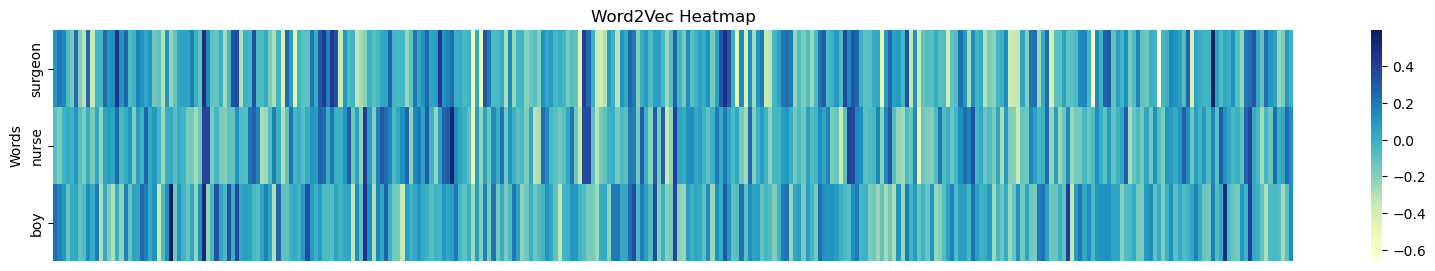

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

words = ['surgeon', 'nurse', 'boy']

def plot_W2V_heatmap(model, words, cmap='YlGnBu', figsize_per_vector=(20, 1)):
    """
    Plot a heatmap for Word2Vec vectors.
    
    Parameters:
    model (gensim.models.Word2Vec): Trained Word2Vec model.
    words (list of str): List of words to plot.
    cmap (str, optional): Colormap for the heatmap. Default is 'YlGnBu'.
    figsize_per_vector (tuple, optional): Tuple specifying figure size per vector. Default is (20, 1).
    """
    # Extract vectors for the given words
    vectors = [model[word] for word in words]

    # Ensure vectors are in 2D format
    num_vectors = len(vectors)
    fig_height = figsize_per_vector[1] * num_vectors
    fig_width = figsize_per_vector[0]
    
    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    sns.heatmap(vectors, cmap=cmap, cbar=True, ax=ax, xticklabels=False)
    
    # Set y-ticks with labels for words
    ax.set_yticks([i + 0.5 for i in range(num_vectors)])
    ax.set_yticklabels(words)
    
    ax.set_ylabel("Words")
    plt.title("Word2Vec Heatmap")
    plt.show()
    
plot_W2V_heatmap(model, words=words)

Le modèle Word2Vec pré-entrainé de Google est bien chargé

#### B. Vectorisation

In [11]:
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np

def word2vec_generator(text_column, model, vector_size=100):
    """
    Génère des représentations Word2Vec moyennes pour une liste de textes.
    
    Parameters:
    texts (list of list[str]): Liste de listes de mots.
    model (gensim.models.Word2Vec): Modèle Word2Vec.
    vector_size (int): Taille des vecteurs du modèle Word2Vec.
    
    Returns:
    pd.DataFrame: DataFrame où chaque ligne est la moyenne des vecteurs des mots d'un texte.
    """
    # Étape 1 : Prétraitement des données (tokenisation)
    tokenized_texts = text_column.apply(word_tokenize).tolist()

    dict_word2vec = {}
    
    for index, word_list in enumerate(tokenized_texts):
        arr = np.zeros(vector_size)  # Initialisation du vecteur de taille `vector_size`
        nb_word = 0
        
        for word in word_list:
            try:
                arr += model[word]  # Accès correct au vecteur
                nb_word += 1
            except KeyError:
                continue  # Ignore les mots absents du vocabulaire
        
        # Ajout du vecteur normalisé dans le dictionnaire
        dict_word2vec[index] = arr / nb_word if nb_word > 0 else arr
    
    # Conversion du dictionnaire en DataFrame
    df_word2vec = pd.DataFrame.from_dict(dict_word2vec, orient='index')
    
    print(f"Les représentations Word2Vec moyennes ont été générées pour {len(tokenized_texts)} textes.")

    return df_word2vec

df_word2vec_without_tfidf_train = word2vec_generator(X_train['abstractText'], model, 300)
df_word2vec_without_tfidf_test = word2vec_generator(X_test['abstractText'], model, 300)

Les représentations Word2Vec moyennes ont été générées pour 25000 textes.
Les représentations Word2Vec moyennes ont été générées pour 25000 textes.


#### C. Run pipelines

In [12]:
taa.run_models(df_word2vec_without_tfidf_train, df_word2vec_without_tfidf_test, y_train, y_test)

Running MultiOutputClassifier...
Evaluating MultiOutputClassifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76     11641
           1       0.95      0.99      0.97     23274
           2       0.85      0.83      0.84     13179
           3       0.91      0.90      0.90     15486
           4       0.81      0.96      0.88     19629
           5       0.82      0.62      0.71      4437
           6       0.82      0.89      0.85     16802
           7       0.62      0.07      0.13      3048
           8       0.71      0.45      0.55      2839
           9       0.71      0.28      0.40      2723
          10       0.70      0.31      0.43      3729
          11       0.85      0.86      0.86     10623
          12       0.79      0.77      0.78     11447
          13       0.76      0.57      0.65      4024

   micro avg       0.85      0.82      0.83    142881
   macro avg       0.79      0.66      0.6

{'MOC': {'micro-F1': 0.8313752862286197,
  'macro-F1': 0.6940577266239742,
  'zero-one-loss': 0.86632},
 'ECC': {'micro-F1': 0.8187333814248327,
  'macro-F1': 0.6934683537438865,
  'zero-one-loss': 0.88588}}

À comparer avec les résultats du modèle W2V pour les données vectorisés avec TF-IDF (mais pour l'instant ça ne marche pas !!!)